САНКТ-ПЕТЕРБУРГСКИЙ ГОСУДАРСТВЕННЫЙ НАЦИОНАЛЬНЫЙ ИССЛЕДОВАТЕЛЬСКИЙ УНИВЕРСИТЕТ ИНФОРМАЦИОННЫХ ТЕХНОЛОГИЙ, МЕХАНИКИ И ОПТИКИ

# Лабораторная работа №2.   Отбор признаков

Выполнили: Романовская Арина, Жихаревич Ирина<br>
Группа К3343

Проверила: Добренко Н. В.

#### Выбор предметной области и набора данных

Датасет "Heart Disease UCI" содержит следующие параметры:
- __age__: возраст в годах
- __sex__: пол (1=муж, 0=жен)
- __chest pain type__: тип боли в груди<br>
    1 = типичная стенокардия (недостаточное кровоснабжение в определенном участке сердца)<br>
    2 = атипичная стенокардия<br>
    3 = неангинальная боль (длительная боль в груди, 5-15 минут)<br>
    4 = бессимптомно<br>
- __resting blood pressure__: артериальное давление в покое (в мм рт. ст. при поступлении в больницу)
- __serum cholestoral__: сыворотка холесторальная в мг / дл
- __fasting blood sugar__: уровень сахара в крови натощак > 120 мг / дл (1 = верно; 0 = неверно)
- __resting electrocardiographic results__: результаты электрокардиографии в покое<br>
0 = нормальное<br>
1 = наличие аномалии волны ST-T (инверсия зубца T и / или повышение или понижение ST > 0,05 мВ) (периоду сердечного цикла, когда оба желудочка полностью охвачены возбуждением)<br>
2 = выявление вероятной или определенной гипертрофии левого желудочка по критериям Эстеса<br>
- __maximum heart rate achieved__: максимальная частота сердечных сокращений
- __exercise induced angina__: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
- __oldpeak__: депрессия ST, вызванная физическими упражнениями относительно отдыха
- __the slope of the peak exercise ST segment__: наклон пика упражнений сегмента ST<br>
1 = восходящий<br>
2 = квартира<br>
3 = снижение<br>
- __ca__: количество крупных сосудов (0-3), окрашенных с помощью флюороскопии
- __thal__: талассемия (3 = нормально; 6 = исправленный дефект; 7 = обратимый дефект)

Ссылка на датасет: https://www.kaggle.com/ronitf/heart-disease-uci

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                   'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Обучающая и тестовая выборки

Разделим датасет на обучающую и тестовую выборки в отношении 80/20. Уберём из обеих выборок информацию о том, есть ли у пациента болезнь сердца или нет.

In [3]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

In [4]:
train_set_labels = train_set["target"].copy()
train_set = train_set.drop("target", axis=1)

test_set_labels = test_set["target"].copy()
test_set = test_set.drop("target", axis=1)

In [5]:
feature_names = train_set.columns
X_train = train_set
Y_train = train_set_labels
X_test = test_set
Y_test = test_set_labels

#### KNN - метод ближайших соседей

Сначала обучим модель на обучающей выборке. Далее попробуем предсказать значение целевого признака по входным признакам для новых объектов с помощью метода predict.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))
print ("Ошибка обучающей выборки: ", round(err_train*100, 2), "%")
print ("Ошибка тестовой выборки: ", round(err_test*100, 2), "%")

Ошибка обучающей выборки:  23.97 %
Ошибка тестовой выборки:  31.15 %


### Отбор признаков с помощью алгоритма случайного леса

Классификация объектов проводится путём голосования: каждое дерево комитета относит классифицируемый объект к одному из классов, и побеждает класс, за который проголосовало наибольшее число деревьев.<br>
Оптимальное число деревьев подбирается таким образом, чтобы минимизировать ошибку классификатора на тестовой выборке. В случае её отсутствия, минимизируется оценка ошибки out-of-bag: тех образцов, которые не попали в обучающую подвыборку за счёт повторений.

In [7]:
def to_string(list1):
    return str(list1).replace('[','').replace(']','').replace('(','').replace("'","").replace(',','').replace(')','\n')

In [8]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, Y_train)

importances = rf.feature_importances_
features = dataset.columns

four_features = sorted(zip(importances, features), reverse=True)[:4]
print("Четыре самых важных признака: \n", to_string(four_features))

Четыре самых важных признака: 
 0.12707733160430276 ca
 0.12132388055390886 oldpeak
 0.10835856371569802 cp
 0.1082537974618369 thal



Алгоритм показал, что самыми важными признаками являются:<br>
- __ca__ - количество крупных сосудов,
- __oldpeak__ - депрессия ST, вызванная физическими упражнениями относительно отдыха,
- __cp__ - тип боли в груди,
- __thal__ - талассемия.<br>
Удалим из обучающей и тестовой выборки все остальные признаки.

In [9]:
train1 = train_set
train1 = train1.drop("age", axis=1)
train1 = train1.drop("sex", axis=1)
train1 = train1.drop("trestbps", axis=1)
train1 = train1.drop("chol", axis=1)
train1 = train1.drop("fbs", axis=1)
train1 = train1.drop("restecg", axis=1)
train1 = train1.drop("thalach", axis=1)
train1 = train1.drop("exang", axis=1)
train1 = train1.drop("slope", axis=1)
train1.head()

,cp,oldpeak,ca,thal
132,1,0.0,0,2
202,0,0.8,0,3
196,2,3.6,0,2
75,1,1.4,0,2
176,0,1.4,2,3


In [10]:
test1 = test_set
test1 = test1.drop("age", axis=1)
test1 = test1.drop("sex", axis=1)
test1 = test1.drop("trestbps", axis=1)
test1 = test1.drop("chol", axis=1)
test1 = test1.drop("fbs", axis=1)
test1 = test1.drop("restecg", axis=1)
test1 = test1.drop("thalach", axis=1)
test1 = test1.drop("exang", axis=1)
test1 = test1.drop("slope", axis=1)
test1.head()

,cp,oldpeak,ca,thal
179,0,0.6,1,1
228,3,0.2,0,3
111,2,0.2,1,3
246,0,1.9,2,3
60,2,0.0,1,2


#### Проверка 

Теперь обучим модель на новой выборке и проверим, изменятся ли ошибки.

In [11]:
knn.fit(train1, Y_train)

err_train = np.mean(Y_train != knn.predict(train1))
err_test  = np.mean(Y_test  != knn.predict(test1))
print ("Ошибка обучающей выборки: ", round(err_train*100, 2), "%")
print ("Ошибка тестовой выборки: ", round(err_test*100, 2), "%")

Ошибка обучающей выборки:  15.7 %
Ошибка тестовой выборки:  13.11 %


При отборе признаков с помощью алгоритма случайного леса ошибка тестовой выборки снизилась с 31.15% до 13.11%.

### Отбор признаков с помощью алгоритма логистической регрессии

Логистическая регрессия – это разновидность множественной регрессии, предназначенная для классификации записей на основании значений входных полей. При этом выходная переменная является категориальной или бинарной (т.е. может принимать только два значения).

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(X_train, Y_train)

c:\users\irka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\irka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\irka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\irka\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\irka\appdata\local\programs\python\python37

In [13]:
rfe_features = fit.support_
rfe_four_features = sorted(zip(rfe_features, features), reverse=True)[:4]
print('Четыре самых важных признака: \n', to_string(rfe_four_features))

Четыре самых важных признака: 
 True slope
 True sex
 True exang
 True ca



Алгоритм показал, что самыми важными признаками являются: 
- __slope__ - наклон пика упражнений сегмента ST,
- __sex__ - пол,
- __exang__ - стенокардия, вызванная физической нагрузкой,
- __ca__ - количество крупных сосудов.
<br>Удалим из обучающей и тестовой выборки все остальные признаки.

In [14]:
train2 = train_set
train2 = train2.drop("age", axis=1)
train2 = train2.drop("oldpeak", axis=1)
train2 = train2.drop("trestbps", axis=1)
train2 = train2.drop("chol", axis=1)
train2 = train2.drop("fbs", axis=1)
train2 = train2.drop("restecg", axis=1)
train2 = train2.drop("thalach", axis=1)
train2 = train2.drop("cp", axis=1)
train2 = train2.drop("thal", axis=1)
train2.head()

,sex,exang,slope,ca
132,1,0,2,0
202,1,1,2,0
196,1,0,1,0
75,0,0,1,0
176,1,1,2,2


In [15]:
test2 = test_set
test2 = test2.drop("age", axis=1)
test2 = test2.drop("oldpeak", axis=1)
test2 = test2.drop("trestbps", axis=1)
test2 = test2.drop("chol", axis=1)
test2 = test2.drop("fbs", axis=1)
test2 = test2.drop("restecg", axis=1)
test2 = test2.drop("thalach", axis=1)
test2 = test2.drop("cp", axis=1)
test2 = test2.drop("thal", axis=1)
test2.head()

,sex,exang,slope,ca
179,1,1,1,1
228,1,0,1,0
111,1,0,2,1
246,0,1,1,2
60,0,0,2,1


#### Проверка 

Теперь обучим модель на новой выборке и проверим, изменятся ли ошибки.

In [16]:
knn.fit(train2, Y_train)

err_train = np.mean(Y_train != knn.predict(train2))
err_test  = np.mean(Y_test  != knn.predict(test2))
print ("Ошибка обучающей выборки: ", round(err_train*100, 2), "%")
print ("Ошибка тестовой выборки: ", round(err_test*100, 2), "%")

Ошибка обучающей выборки:  15.29 %
Ошибка тестовой выборки:  22.95 %


Таким образом, ошибка тестовой выборки снизилась с 31.15% до 22.95%.

#### Вывод

В лабораторной работе №5 "Отбор признаков" я провела отбор признаков с помощью алгоритмов случайного леса и логистической регрессии. В результате отбора ошибка на тестовой выборке снизилась с 31.15% до 13.11% и 22.95% соответственно. Таким образом, отбор признаков позволяет находить модель оптимальной сложности, при которой переобучение минимально.

__Описание выделенных признаков:__

Следовательно, наиболее важнными признаками являются:<br>
- __oldpeak__ - депрессия ST, вызванная физическими упражнениями относительно отдыха,
- __slope__ - наклон пика упражнений сегмента ST,
- __cp__ - тип боли в груди,
- __thal__ - талассемия,
- __sex__ - пол (муж или жен),
- __exang__ - стенокардия, вызванная физической нагрузкой (есть или нет),
- __ca__ - количество крупных сосудов.

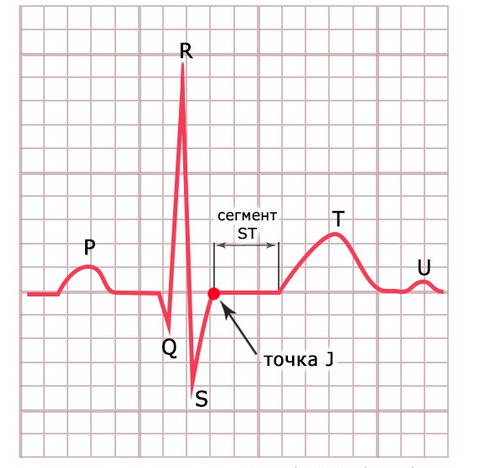

Рисунок 1 - __Сегмент ST__ на электрокардиограмме (ЭКГ)

При отсутствии других признаков повреждения миокарда (например, зубца Q или глубоких отрицательных Т) вогнутая элевация ST обычно носит доброкачественный характер, а косовосходящая или выпуклая элевация обычно патологическая и связана с ишемией миокарда.

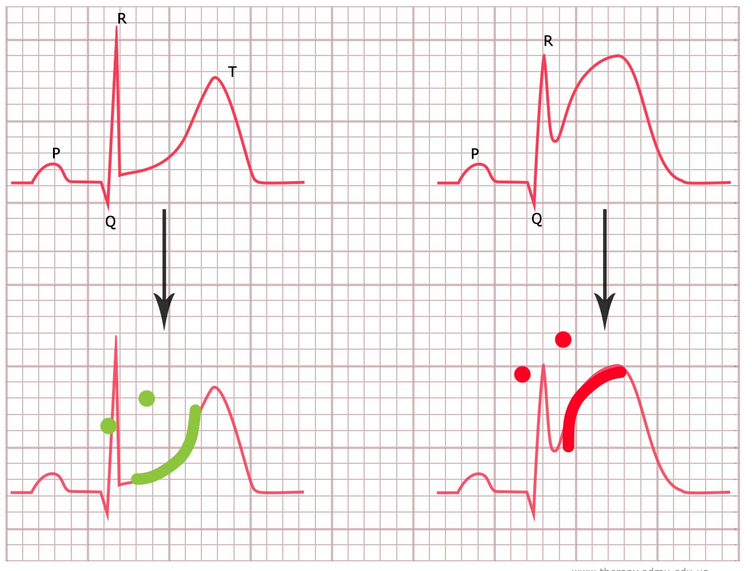

Рисунок 2 - Вогнутая и выпуклая форма элевации ST

__Тип боли в груди:__<br>
    1 = типичная стенокардия (недостаточное кровоснабжение в определенном участке сердца)<br>
    2 = атипичная стенокардия<br>
    3 = неангинальная боль (длительная боль в груди, 5-15 минут)<br>
    4 = бессимптомно<br>

__Талассемия__ (анемия Кули) — заболевание, наследуемое по рецессивному типу (двухаллельная система), в основе которого лежит снижение синтеза полипептидных цепей, входящих в структуру нормального гемоглобина. В норме основным вариантом (97 %) гемоглобина взрослого человека является гемоглобин А. Это тетрамер, состоящий из двух мономеров α-цепей и двух мономеров β-цепей. 3 % гемоглобина взрослых представлено гемоглобином А2, состоящим из двух альфа- и двух дельта-цепей. Существуют два гена HBA1 и HBA2, кодирующих мономер альфа, и один HBB-ген, кодирующий мономер бета. Наличие мутации в генах гемоглобина может привести к нарушению синтеза цепей определённого вида.

__Стенокардия__ - клинический синдром, характеризуемый ощущением или чувством дискомфорта за грудиной. Боль появляется внезапно при физической нагрузке или эмоциональном стрессе, после приёма пищи, обычно иррадиирует в область левого плеча, шеи, нижнюю челюсть, между лопаток, левую подлопаточную область и продолжается не более 10—15 мин. Боль исчезает при прекращении физической нагрузки или приёме нитрата короткого действия.